# Optimal Node Placement - using Genetic Algorithm

In [322]:
#importing necassary libraries
import numpy as np
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from scipy.spatial import distance
from matplotlib import pyplot as plt

## a) We begin Initially by distributing the targets, random and uniformly throughout the surveillance area :-

In [323]:
#Choosing randomly and uniformly positioned sensors
x = np.random.uniform(0,500,17)
y = np.random.uniform(0,500,17)
target_pos = list(zip(x,y))
target_pos = np.array(target_pos)

## b) Now we design a Genetic algorithm, that optimizes the number of sensors required to cover the given targets. 

In [324]:
# Declaring a threshold for Cross-over to take place
cp=0.2
# Declaring a threshold for mutation to take place
mp=0.1

# Developing a function to validate the crossover
def isValid(input_1,input_2):
    if(set(input_1)==input_2):
        return True
    else:
        return False
    
## Tabulating the cluster centers for the defined population
def SCenters(samp):
    centers={}
    for i in set(samp):
        A=[]
        for j in samp:
            if(j==i):
                A.append(True)
            else:
                A.append(False)
        centers[i]=np.array(target_pos[A].mean())
    return centers

def getCenters(Gen):
    GenCenters=[]
    for samp in Gen:
        GenCenters.append(SCenters(samp))
    return GenCenters

# Tabulating the fitness : By calculating the Eucledian distance for within the clusters and adding them up 
def getFit(sample,centers):
    fit=0
    for i in range(0,len(sample)):
        fit = fit + distance.euclidean(target_pos[i],centers[sample[i]])
    return fit

def getFitness(Gen):
    GenCenters=getCenters(Gen)
    fitness=[]                      
    for i in range(0,len(Gen)):
        fitness.append(getFit(Gen[i],GenCenters[i]))
    return fitness

# Establising the CrossOver function
def crossOver(c1,c2):
    pos=np.random.randint(1,len(c1))
    c1[pos:],c2[pos:]=c2[pos:],c1[pos:]
    return c1,c2

# Establising the mutation function
def mute(samp):
    tget=np.random.randint(0,R)
    by=np.random.randint(0,K) 
    if(samp[tget]!=by):
        samp[tget]=by
    else:
        samp[tget]=(samp[tget]+by)%K
def mutate(Gen):
    for samp in Gen: 
        pb=np.random.random()
        if(pb<mp):
            mute(samp)

## Generating a sample population to work on :-

In [325]:
# establishing the number of clusters
K=7

# The number of targets for which the sensor coverage is required
R=len(target_pos)
c=set(np.linspace(0,K-1,K))

# Establishing the population size
P=4
i=0
currentGen=[]
nextGen=[]
while(i<P):
        nextGen.append([])
        currentGen.append(      list( np.random.randint(0,K,R)    )  )
        print(set(currentGen[i]))
        i=i+1
thebest=currentGen[0]

{0, 1, 2, 3, 4, 5, 6}
{0, 2, 3, 4, 5, 6}
{0, 1, 2, 3, 4, 5, 6}
{0, 1, 2, 3, 4, 5, 6}


## Using K-means as a comparitive measure :-

In [326]:
kmeans=KMeans(K,max_iter= 1500).fit(target_pos)
klabels=kmeans.labels_
centers = kmeans.cluster_centers_
centers = np.array(centers)
print('The sensors that cover the targets as per K means :- ', klabels)

The sensors that cover the targets as per K means :-  [5 2 0 0 2 1 3 6 1 1 3 4 6 3 1 5 1]


## Now that we have tabulated the sensors which cover the given targets by k means, we will compare this to genetic algorithm, using the silhouette score as a comparison measure.

In [327]:
stop=1
while(stop<=1500):
    print(" Genetic Algo Generation- ",stop,'START')
    
    # Selection
    fit=np.array(getFitness(currentGen))
    pool=fit.argsort()
    
    # Cross-over
    for i in range(0,P,2):
        pb=np.random.random()
        if(pb<cp):
            while(True):
                ch1,ch2=crossOver(currentGen[pool[i]],currentGen[pool[i+1]])
                if( isValid(ch1,c) and isValid(ch2,c) ):
                    break
        else:                                                        # if no crossover, sends as it is
            ch1,ch2=currentGen[pool[i]],currentGen[pool[i+1]]
        nextGen[i]=ch1
        nextGen[i+1]=ch2

    # Mutation
    mutate(nextGen)
    
    curr_fit=list(fit)
    next_fit=np.array(getFitness(nextGen))
    s0=currentGen[fit.argmin()].copy()     #best string of currentGen
    
    if( silhouette_score(target_pos,thebest)  <  silhouette_score(target_pos,s0)  ):
        thebest=s0.copy()                       #Storing the best string in all generations generated so far
    if(max(next_fit)>min(curr_fit)):              
        nextGen[next_fit.argmax()]=thebest.copy()
    
    currentGen=nextGen.copy()
    print('\t\tEND',"silhouette score=",silhouette_score(target_pos,s0))
    stop=stop+1

 Genetic Algo Generation-  1 START
		END silhouette score= -0.4437326257157446
 Genetic Algo Generation-  2 START
		END silhouette score= -0.4437326257157446
 Genetic Algo Generation-  3 START
		END silhouette score= -0.4437326257157446
 Genetic Algo Generation-  4 START
		END silhouette score= -0.4437326257157446
 Genetic Algo Generation-  5 START
		END silhouette score= -0.4437326257157446
 Genetic Algo Generation-  6 START
		END silhouette score= -0.31197388842549034
 Genetic Algo Generation-  7 START
		END silhouette score= -0.31197388842549034
 Genetic Algo Generation-  8 START
		END silhouette score= -0.31197388842549034
 Genetic Algo Generation-  9 START
		END silhouette score= -0.31197388842549034
 Genetic Algo Generation-  10 START
		END silhouette score= -0.31197388842549034
 Genetic Algo Generation-  11 START
		END silhouette score= -0.3344662083439154
 Genetic Algo Generation-  12 START
		END silhouette score= -0.31197388842549034
 Genetic Algo Generation-  13 START
		END s

In [328]:
# Printing the silhouette score :-
print('The Genetic algorithm score =',silhouette_score(target_pos,thebest))
print('The K-means algorithm score =',silhouette_score(target_pos,klabels))

The Genetic algorithm score = 0.4915574144555226
The K-means algorithm score = 0.4915574144555226


## From the above scores, we can see that the proposed genetic algorithm, provides similar performance to k-means
### - Now lets plot these optimal postions of the sensors, and observe how the targets get covered.

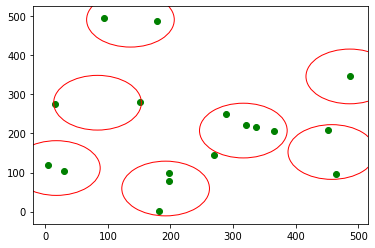

In [331]:
for x,y in target_pos:
    ax = plt.gca()
    ax.scatter(x,y,c='g')
for x,y in centers:
    c = plt.Circle((x,y), radius= 70,linewidth=1,edgecolor='r',facecolor='none')
    ax=plt.gca()
    ax.add_patch(c)
plt.show()

## As we can see, from the sensors placement above that all the given targets have been covered. Therefore, now we will compute the cost of these optimally placed sensors.

In [332]:
cost = 170
min_cost = K * cost
print('The minimized cost of the sensor placement problem is - ', min_cost, 'Units')

The minimized cost of the sensor placement problem is -  1190 Units
